In [45]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [46]:
# Step 2: Dataset paths
train_dir = r"C:\Users\prasa\Desktop\SVM project\archive (2)\dogs_vs_cats\train"
test_dir  = r"C:\Users\prasa\Desktop\SVM project\archive (2)\dogs_vs_cats\test"


In [47]:
print("Train Path Exists:", os.path.exists(train_dir))
print("Test Path Exists:", os.path.exists(test_dir))
print("Train Folders:", os.listdir(train_dir))


Train Path Exists: True
Test Path Exists: True
Train Folders: ['cats', 'dogs']


In [48]:
def load_data(data_dir, limit=None, img_size=(64, 64)):
    X, y = [], []

    for folder, label in [("cats", 0), ("dogs", 1)]:
        folder_path = os.path.join(data_dir, folder)
        files = os.listdir(folder_path)[:limit]  # take 'limit' per class

        for file in files:
            img_path = os.path.join(folder_path, file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                continue
            img = cv2.resize(img, img_size).flatten() / 255.0
            X.append(img)
            y.append(label)

    return np.array(X), np.array(y)


In [49]:
# Adjust your dataset paths
train_dir = r"C:\Users\prasa\Desktop\SVM project\archive (2)\dogs_vs_cats\train"
test_dir  = r"C:\Users\prasa\Desktop\SVM project\archive (2)\dogs_vs_cats\test"

# Load with more samples for better training
x_train, y_train = load_data(train_dir, limit=1000)  # 1000 cats + 1000 dogs
x_test, y_test   = load_data(test_dir, limit=250)    # 250 cats + 250 dogs


print("Training samples:", x_train.shape, y_train.shape)
print("Testing samples:", x_test.shape, y_test.shape)
print("First 10 labels:", y_train[:10])  # sanity check


Training samples: (2000, 4096) (2000,)
Testing samples: (500, 4096) (500,)
First 10 labels: [0 0 0 0 0 0 0 0 0 0]


In [50]:
print("Cats in train:", sum(y_train==0))
print("Dogs in train:", sum(y_train==1))


Cats in train: 1000
Dogs in train: 1000


In [51]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Training SVM...")
svm_model = SVC(kernel='rbf', gamma=0.001, C=10, random_state=42)  # better than linear
svm_model.fit(x_train, y_train)

# Predict
y_pred = svm_model.predict(x_test)

# Evaluate
print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred, target_names=["Cat", "Dog"]))
print("\n🔎 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Training SVM...

✅ Accuracy: 0.6

📊 Classification Report:
               precision    recall  f1-score   support

         Cat       0.60      0.61      0.60       250
         Dog       0.60      0.59      0.60       250

    accuracy                           0.60       500
   macro avg       0.60      0.60      0.60       500
weighted avg       0.60      0.60      0.60       500


🔎 Confusion Matrix:
 [[153  97]
 [103 147]]


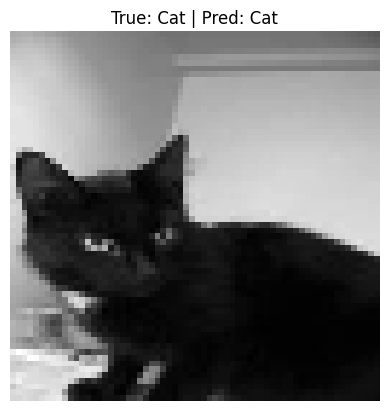

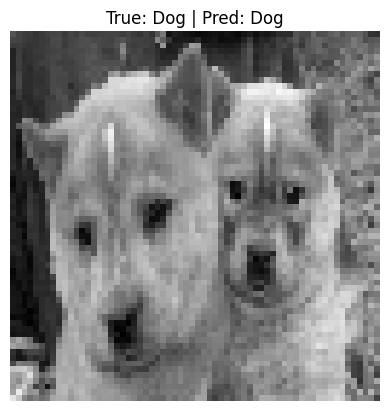

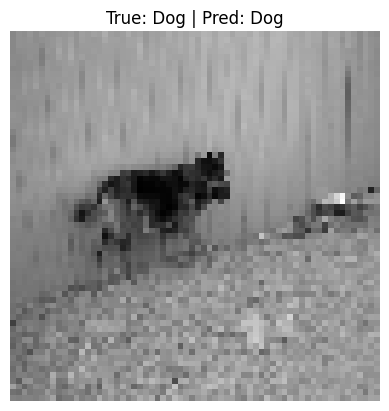

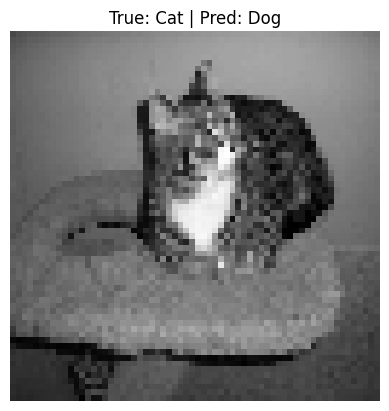

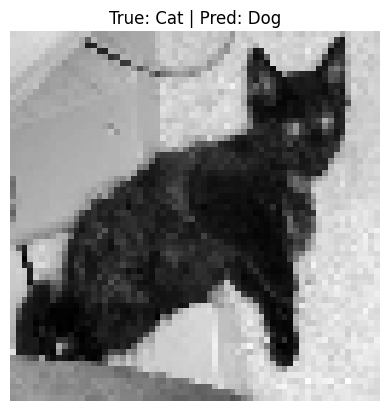

In [52]:
import matplotlib.pyplot as plt
import random

def show_predictions(n=5):
    indices = random.sample(range(len(x_test)), n)
    for i in indices:
        img = x_test[i].reshape(64, 64)
        true_label = "Cat" if y_test[i] == 0 else "Dog"
        pred_label = "Cat" if y_pred[i] == 0 else "Dog"
        
        plt.imshow(img, cmap="gray")
        plt.title(f"True: {true_label} | Pred: {pred_label}")
        plt.axis("off")
        plt.show()

# Show 5 random predictions
show_predictions(5)


In [53]:
def predict_and_show(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img, (64, 64)).flatten().reshape(1, -1) / 255.0

    pred = svm_model.predict(img_resized)[0]
    label = "🐱 Cat" if pred == 0 else "🐶 Dog"

    plt.imshow(cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB))
    plt.title(f"Prediction: {label}")
    plt.axis("off")
    plt.show()

    return label


Selected Image: C:\Users\prasa\Desktop\SVM project\archive (2)\dogs_vs_cats\test\dogs\dog.10021.jpg


C:\Users\prasa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128054 (\N{DOG FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


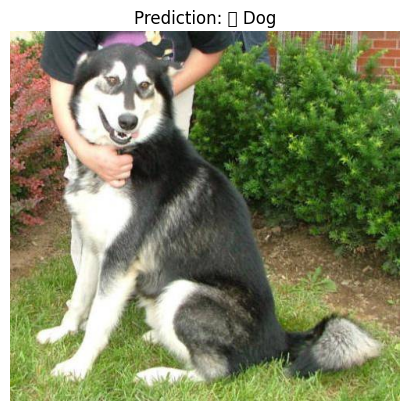

Model Prediction: 🐶 Dog


In [54]:
img_path = os.path.join(test_dir, "dogs", os.listdir(os.path.join(test_dir, "dogs"))[6])
print("Selected Image:", img_path)
result = predict_and_show(img_path)
print("Model Prediction:", result)
